# Implementation of the Morris-Lecar model

Goal: "Based on the neuron dynamics (folder “handson_neuronModels”), study the dynamics of another neuron model, e..g he Morris-Lecar model; it is a neuron model able to reproduce the oscillatory behavior in relation to Ca+ and K+ conductance".

The Morris–Lecar model is a neuron model developed by Catherine Morris and Harold Lecar to reproduce the variety of oscillatory behavior in relation to Ca++ and K+.

# Equations:

The pair of coupled first order equations of the model are:

$C\frac{dv}{dt}=I-g_{L}(V-V_{L})-g_{Ca}M_{ss}(V-V_{Ca})-g_{K}N(V-V_{K})\\
\frac{dN}{dt}=\frac{N_{ss}-N}{τ_{N}}$



$M_{ss}=\frac{1}{2}(1+tanh[\frac{V-V_{1}} {V_{2}}])\\
N_{ss}=\frac{1}{2}(1+tanh[\frac{V-V_{3}}{V_{4}}])\\
τ_{N}=\frac{1}{φcosh[\frac{V-V_{3}}{2V_{4}}]}$




In [ ]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import numpy as np

Let's start by creating the model.

In [ ]:
def morris_lecar_model(I_stimulus, params, t_start=0, t_end=200, dt=0.01):
  # Parameters
  C, g_L, V_L, g_K, V_K, g_Ca, V_Ca, V1, V2, V3, V4, phi = params
  num_steps = int((t_end - t_start) / dt)

  # Initialize variables
  V = np.zeros(num_steps)
  N = np.zeros(num_steps)
  V[0] = -55
  N[0] = 0.02

  for i in range(1, num_steps):
    M_ss = (1/2) * (1 + np.tanh((V[i-1] - V1) / V2))
    N_ss = (1/2) * (1 + np.tanh((V[i-1] - V3) / V4))
    tau_n = 1 / (phi * np.cosh((V[i-1] - V3) / (2 * V4)))

    L = g_L * (V[i-1] - V_L)
    Ca = g_Ca * M_ss * (V[i-1] - V_Ca)
    K = g_K * N[i-1] * (V[i-1] - V_K)

    dV = (I_stimulus[i-1] - Ca - K - L) / C
    dN = (N_ss - N[i-1]) / tau_n

    V[i] = V[i-1] + dt * dV
    N[i] = N[i-1] + dt * dN

  return V, N

In [ ]:
def plotting(V, I):
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(len(V)), V)
  plt.xlabel('Time (ms)')
  plt.ylabel('Membrane Potential (mV)')
  plt.title('Morris-Lecar Model Simulation')
  plt.grid(True)
  plt.show()

In [ ]:
params = {
  'C': 20.0,
  'g_L': 2.0,
  'V_L': -50.0,
  'g_K': 8.0,
  'V_K': -100.0,
  'g_Ca': 4.0,
  'V_Ca': 120.0,
    'V1': -1.2,
    'V2': 18.0,
    'V3': 2.0,
    'V4': 30.0,
    'phi': 0.04
}


Let's see how the model behaves with a stilmulus of 50 μA/cm².

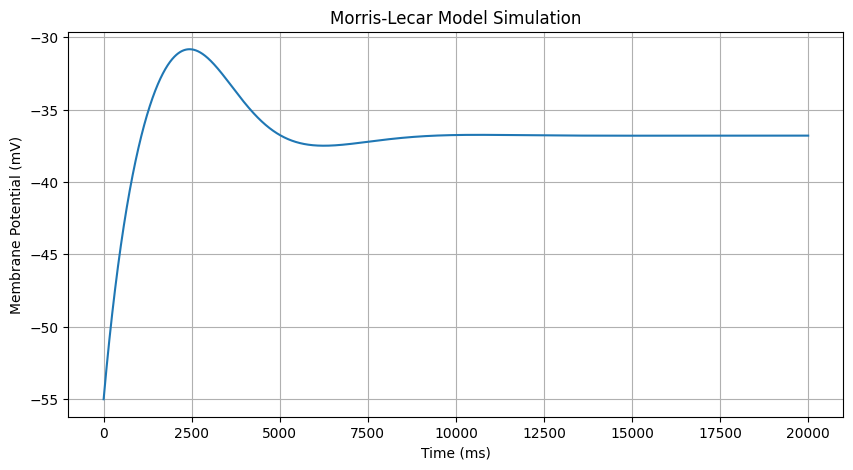

In [ ]:
I_value = 50
length = 20000
I_stimulus = np.full(length, I_value)
V, N = morris_lecar_model(I_stimulus, list(params.values()))
plotting(V, I_value)

There is a change in membrane potential but it is not enough to create a spike.

Let's see how the model behaves with a stilmulus of 100 μA/cm².

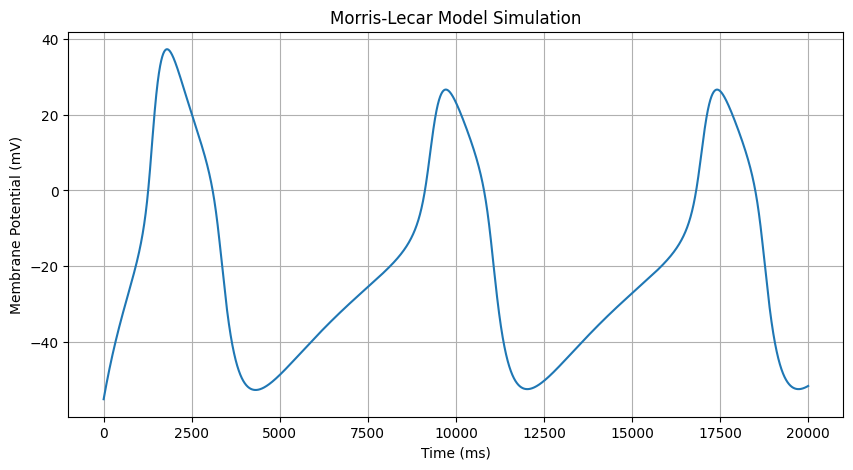

In [ ]:
I_value = 100
length = 20000
I_stimulus = np.full(length, I_value)
V, N = morris_lecar_model(I_stimulus, list(params.values()))
plotting(V, I_value)

Here it seems that the higher injected current lead to the creation of spikes

Let's see a united plot where we can observe how the membrene potential chenges due to changes in the stimulus.

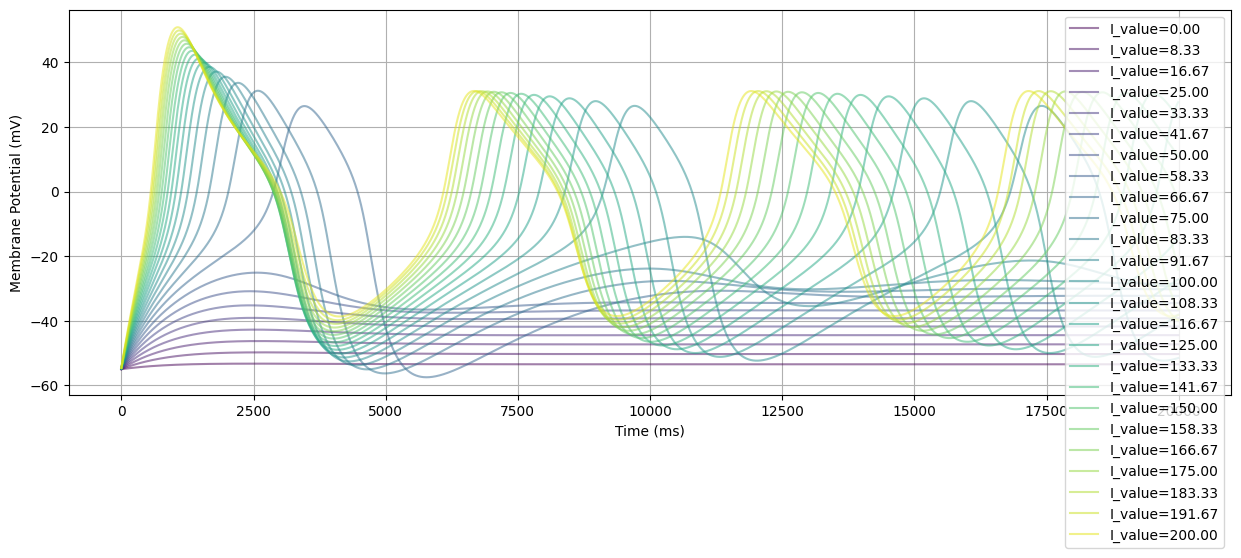

In [ ]:
I_values = np.linspace(0, 200, 25)
plt.figure(figsize=(15, 5))
for i, I_value in enumerate(I_values):
    I_stimulus = np.full(20000, I_value)
    V, _ = morris_lecar_model(I_stimulus, list(params.values()))
    smoothed_V = np.convolve(V, np.ones(10)/10, mode='valid')  # Smoothing with a 10-point moving average
    plt.plot(np.arange(len(smoothed_V)), smoothed_V, color=plt.cm.viridis(i / len(I_values)), alpha=0.5, label=f'I_value={I_value:.2f}')

plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()

As the applied stimulus current increases (from 0.00 to 200.00 mA/cm^2), the membrane potential appears to gradually shift upwards and the spiking frequency increases.

Let's take a look at how the model behaves when the stimmulus is not constant.

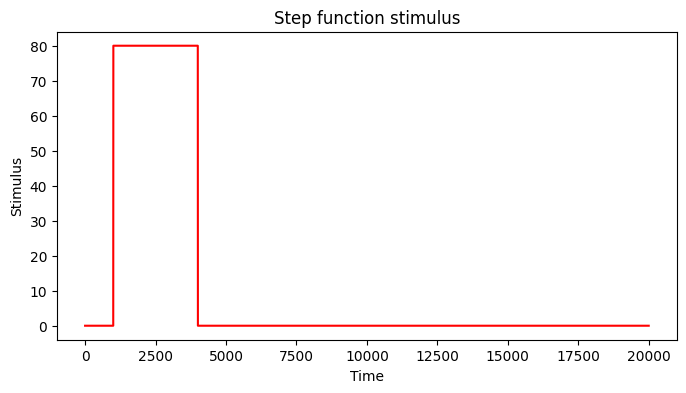

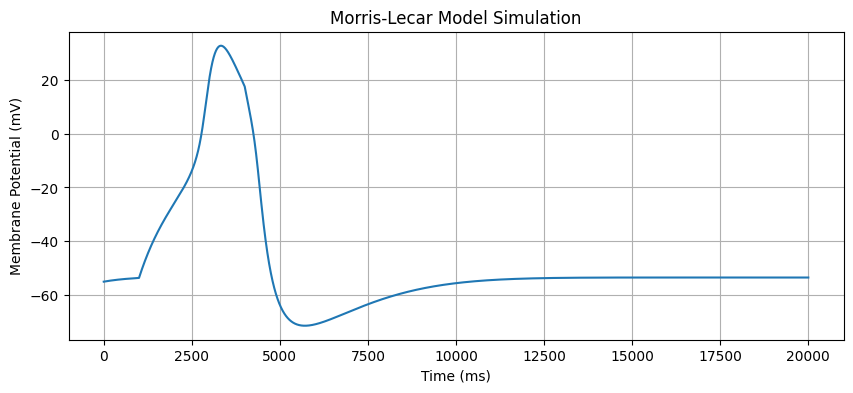

In [ ]:
# Generate input stimulus
value = 80
length = 20000
begin = 1000
end = 4000
stimulus = np.zeros(length)
stimulus[begin:end] = value

# Function to simulate the Morris-Lecar model

# Plot input stimulus
plt.figure(figsize=(8, 4))
plt.plot(stimulus, color='red')
plt.xlabel('Time')
plt.ylabel('Stimulus')
plt.title('Step function stimulus')
plt.show()

# Applied current
I_values = [stimulus]

print("\n")

# Plot results
plt.figure(figsize=(10, 4))
for I in I_values:
    V, N = morris_lecar_model(I, list(params.values()))
    plt.plot(np.arange(len(V)), V)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Morris-Lecar Model Simulation')

plt.grid(True)
plt.show()

 There is a clear shift upwards in the voltage trace when stimulus is being injected.

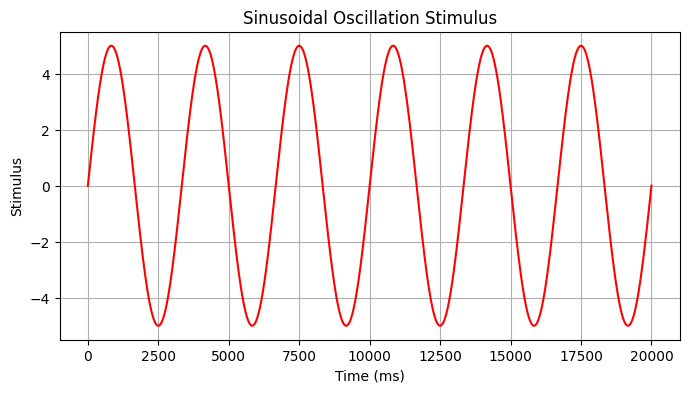

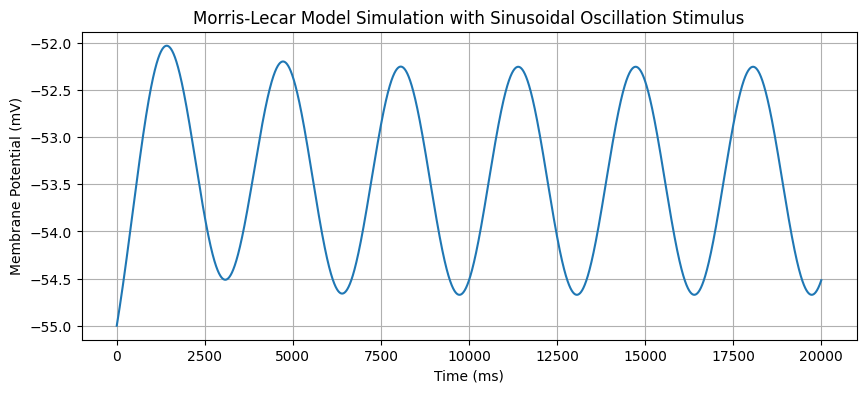

In [ ]:
t = np.linspace(0, 200, 20000)
stimulus = 5 * np.sin(2 * np.pi *0.03* t)

plt.figure(figsize=(8, 4))
plt.plot(stimulus, color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Sinusoidal Oscillation Stimulus')
plt.grid(True)
plt.show()

V, N = morris_lecar_model(stimulus, list(params.values()))
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(V)), V)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Morris-Lecar Model Simulation with Sinusoidal Oscillation Stimulus')
plt.grid(True)
plt.show()

 The membrane potential exhibits oscillations over time, following the sinusoidal pattern of the input stimulus.

#Sensitivity Analysis

The objective is to assess the sensitivity of the Morris-Lecar neuron model to changes in individual parameters through a systematic perturbation analysis.

##Modifying membrane capacitance (C)

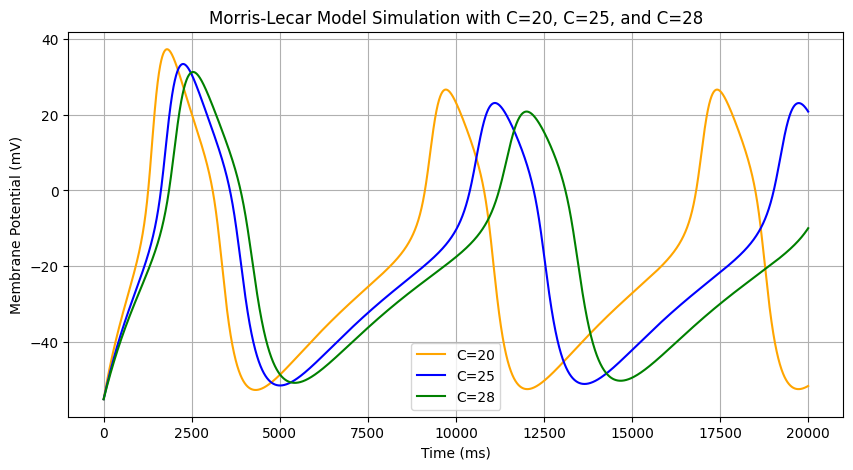

In [ ]:
#Taking three params in consideration by changing only the Membrane Capacitance (C)

params1 = params.copy()
params1['C'] = 20.0

params2 = params.copy()
params2['C'] = 25.0

params3 = params.copy()
params3['C'] = 28.0

# Applied current
I_value = 100
length = 20000
I_stimulus = np.full(length, I_value)

# Plot results for different applied currents
plt.figure(figsize=(10, 5))

V, N = morris_lecar_model(I_stimulus, list(params1.values()))
plt.plot(np.arange(len(V)), V, color='orange')

V, N = morris_lecar_model(I_stimulus, list(params2.values()))
plt.plot(np.arange(len(V)), V, color='blue')

V, N = morris_lecar_model(I_stimulus, list(params3.values()))
plt.plot(np.arange(len(V)), V, color='green')

plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Morris-Lecar Model Simulation with C=20, C=25, and C=28')
plt.legend(['C=20', 'C=25', 'C=28'])
plt.grid(True)
plt.show()

Modifying membrane capacitance (C) affects the rate of membrane charging. An increase in capacitance slows down the model's response to applied current changes.


##Modifying Potassium Channel Conductance (g_K)

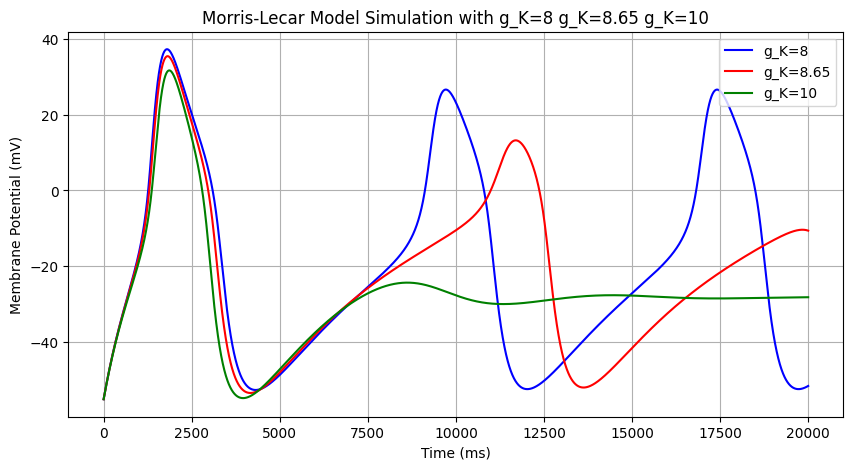

In [ ]:
#Taking three params in consideration by changing only the Potassium Channel Conductance (g_K)

params4 = params.copy()
params4['g_K'] = 8.0

params5 = params.copy()
params5['g_K'] = 8.65

params6 = params.copy()
params6['g_K'] = 10.0

# Applied current
I_value = 100
length = 20000
I_stimulus = np.full(length, I_value)

# Plot results for different applied currents
plt.figure(figsize=(10, 5))
V, N = morris_lecar_model(I_stimulus, list(params4.values()))
plt.plot(np.arange(len(V)), V, color='blue')

V, N = morris_lecar_model(I_stimulus, list(params5.values()))
plt.plot(np.arange(len(V)), V, color='red')

V, N = morris_lecar_model(I_stimulus, list(params6.values()))
plt.plot(np.arange(len(V)), V, color='green')

plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Morris-Lecar Model Simulation with g_K=8 g_K=8.65 g_K=10')
plt.legend(['g_K=8', 'g_K=8.65', 'g_K=10'])
plt.grid(True)
plt.show()

 Modifying potassium channel conductance (g_K) impacts the membrane repolarization after an action potential. Increasing the conductance of this channel leads to faster repolarization and more negative membrane potentials.

##Modifying Calcium channel conductance (g_Ca)

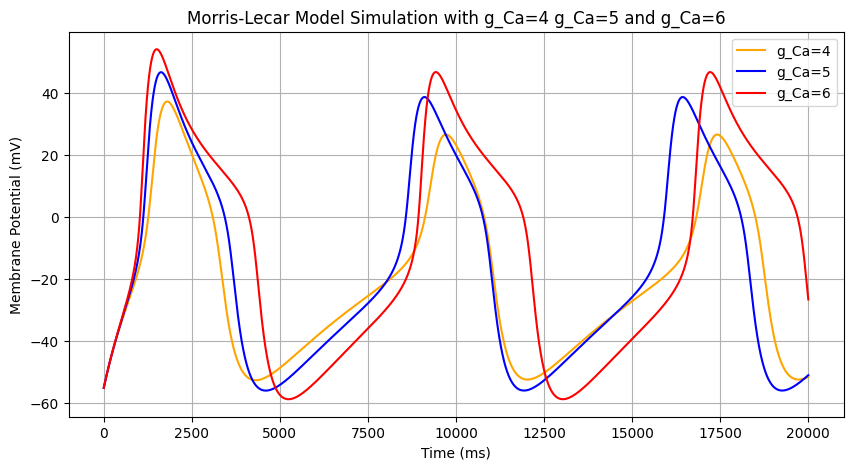

In [ ]:
#Taking three params in consideration by changing only the Calcium Channel Conductance (g_Ca)

params7 = params.copy()
params7['g_Ca'] = 4.0

params8 = params.copy()
params8['g_Ca'] = 5.0

params9 = params.copy()
params9['g_Ca'] = 6.0

# Applied current
I_value = 100
length = 20000
I_stimulus = np.full(length, I_value)

# Plot results for different applied currents
plt.figure(figsize=(10, 5))
V, N = morris_lecar_model(I_stimulus, list(params7.values()))
plt.plot(np.arange(len(V)), V, color='orange')

V, N = morris_lecar_model(I_stimulus, list(params8.values()))
plt.plot(np.arange(len(V)), V, color='blue')

V, N = morris_lecar_model(I_stimulus, list(params9.values()))
plt.plot(np.arange(len(V)), V, color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Morris-Lecar Model Simulation with g_Ca=4 g_Ca=5 and g_Ca=6')
plt.legend(['g_Ca=4', 'g_Ca=5','g_Ca=6'])
plt.grid(True)
plt.show()

Modifying Calcium channel conductance (g_Ca) affects the calcium entry into the cell during an action potential. An increase in conductance leads to increased calcium influx and therefore greater activation of potassium channels.